In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import datetime


# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import awesome_functions as cf

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

cmap = sns.light_palette("orange", as_cmap=True)

# def addDays(date):
#     temp = date.split("-")
#     year, month, date = int(temp[0]), int(temp[1]), int(temp[2])
#     return datetime.datetime(year, month, date).weekday()
# df_train_with_weather["day"] = df_train_with_weather["date"].apply(addDays)

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
station_1 = cf.getSpecifiedWeatherData(df_weather, 1)

In [5]:
cf.isThereNoneData(station_1)

M Data over 60% : ['depart', 'snowfall']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,2,0.19,0,0.00,0,0.0
3,tmin,1035,2,0.19,0,0.00,0,0.0
4,tavg,1035,6,0.58,0,0.00,0,0.0
5,depart,1035,1035,100.00,0,0.00,0,0.0
6,dewpoint,1035,6,0.58,0,0.00,0,0.0
7,wetbulb,1035,11,1.06,0,0.00,0,0.0
8,heat,1035,6,0.58,0,0.00,0,0.0
9,cool,1035,6,0.58,0,0.00,0,0.0


In [6]:
cf.remove_columns(station_1, ["depart", "snowfall", "sunrise", "sunset"])

제거한 컬럼명 : ['depart', 'snowfall', 'sunrise', 'sunset']


,station_nbr,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1030,1,2014-10-27,61,41,51,38,44,14,0,,0.00,29.70,29.89,6.3,27,7.3
1031,1,2014-10-28,65,37,51,45,48,14,0,BR,0.00,29.86,30.02,1.4,09,3.6
1032,1,2014-10-29,66,48,57,51,53,8,0,RA FG+ FG BR,0.11,29.70,29.86,2.9,27,4.4
1033,1,2014-10-30,57,39,48,39,43,17,0,,0.00,29.78,29.95,2.1,28,3.7
1034,1,2014-10-31,53,40,47,36,41,18,0,,0.00,29.87,30.03,5.4,04,5.8


In [7]:
station_1 = cf.remove_m_row(station_1, ["tmax", "tmin", "tavg"])
station_1_dropped_all = cf.remove_m_row(station_1)

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1029
원본 데이터프레임 length : 1029
제거하고 싶은 컬럼 : ['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 1012


# 1번 스테이션 온도 값들 비교

## 온도 컬럼만 m 벨류 제거함

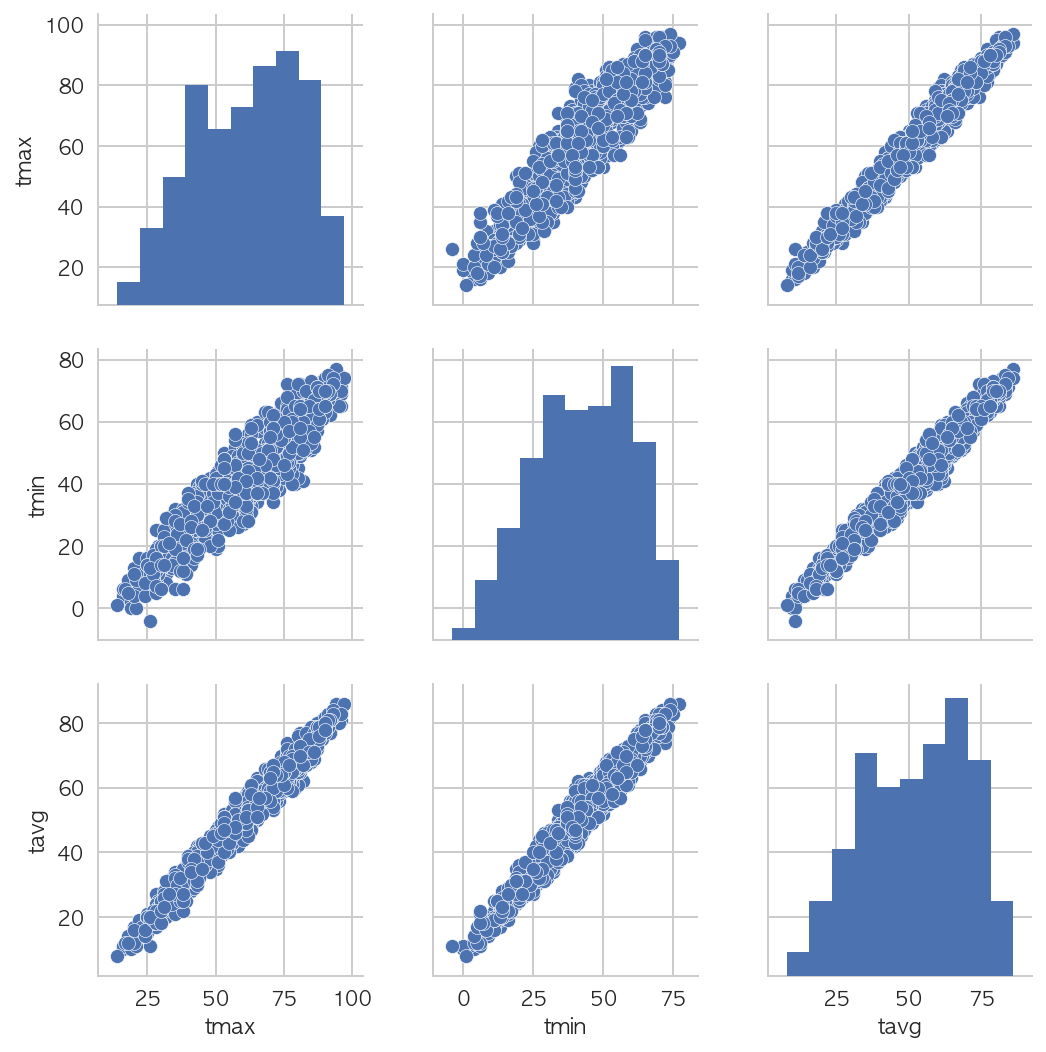

In [8]:
col_t = ["tmax", "tmin", "tavg"]
sns.pairplot(station_1[col_t])
plt.show()

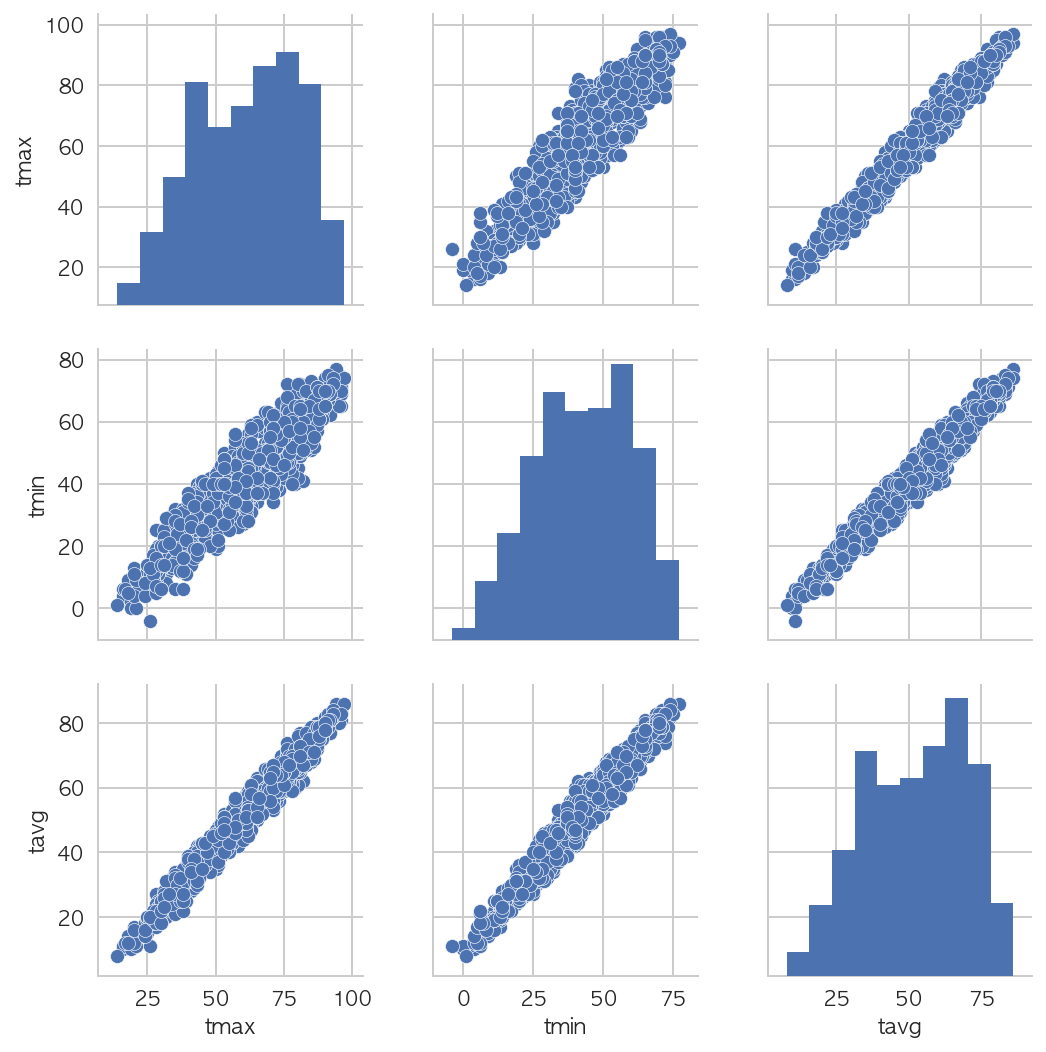

In [9]:
sns.pairplot(station_1_dropped_all[col_t])
plt.show()

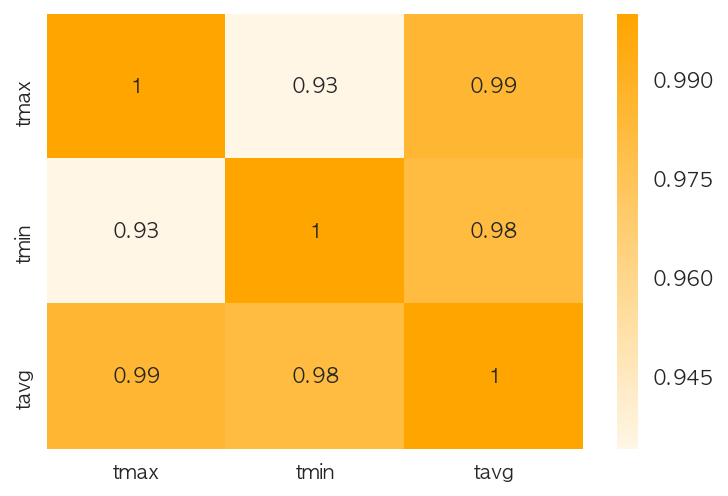

In [10]:
station_1_t = sns.light_palette("orange", as_cmap=True)
sns.heatmap(station_1[col_t].corr(), annot=True, cmap=station_1_t)
plt.show()

In [12]:
station_1_dew_wet = cf.remove_m_row(station_1, ["dewpoint", "wetbulb"])

원본 데이터프레임 length : 1029
제거하고 싶은 컬럼 : ['dewpoint', 'wetbulb']
제거한 int 컬럼 : ['dewpoint', 'wetbulb']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1021


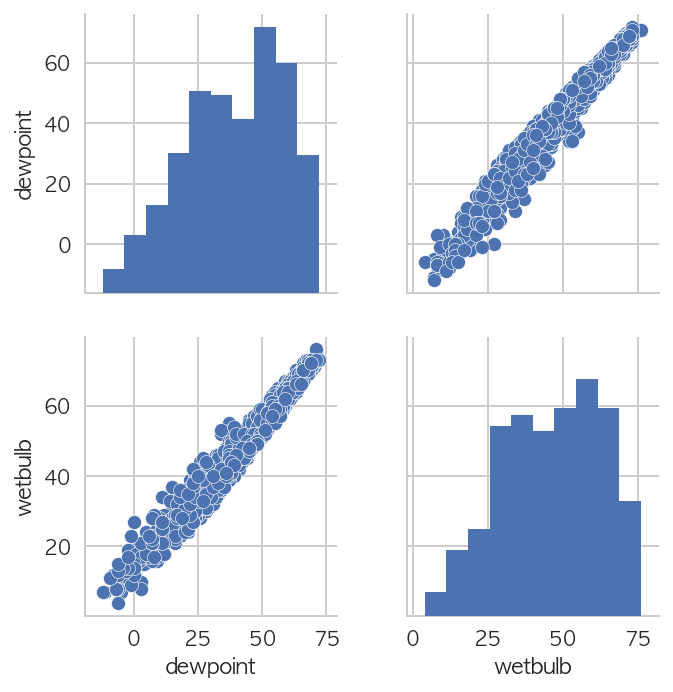

In [14]:
col_dw = ["dewpoint", "wetbulb"]
sns.pairplot(station_1_dew_wet[col_dw])
plt.show()

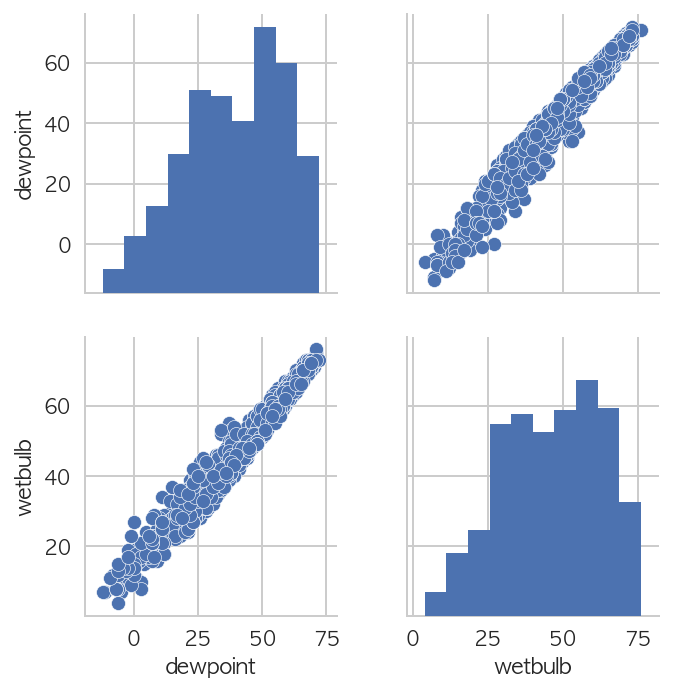

In [15]:
sns.pairplot(station_1_dropped_all[col_dw])
plt.show()

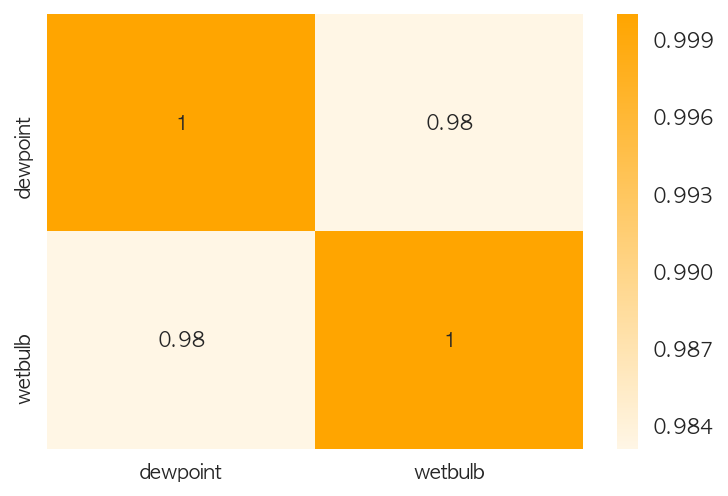

In [17]:
sns.heatmap(station_1_dew_wet[col_dw].corr(), annot=True, cmap=cmap)
plt.show()

1. tmax, tmin, tavg, depart
2. dewpoint, wetbulb, 
3. heat, cool, sunrise, sunset
4. snowfall, preciptotal, stnpressure, sealevel
5. resultspeed, resultdir, avgspeed

In [18]:
station_1_h_c = cf.remove_m_row(station_1, ["heat", "cool"])

원본 데이터프레임 length : 1029
제거하고 싶은 컬럼 : ['heat', 'cool']
제거한 int 컬럼 : ['heat', 'cool']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1029


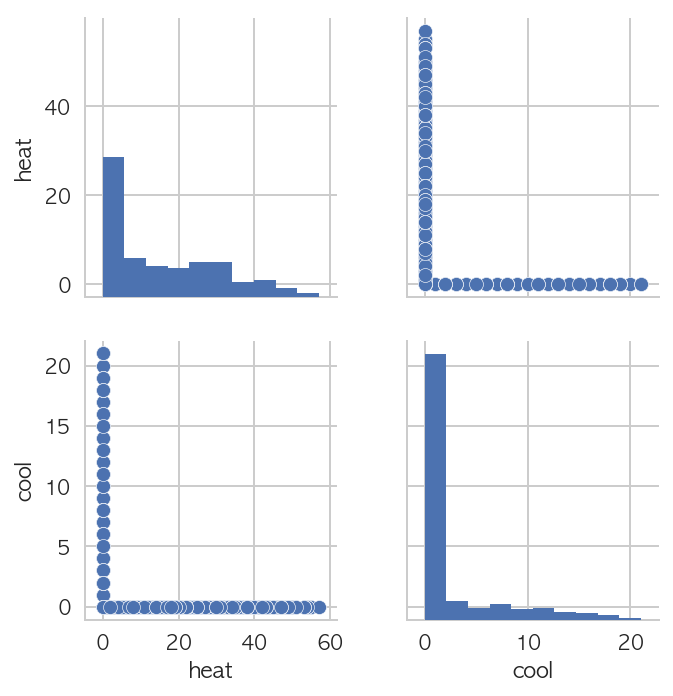

In [20]:
col_h_c = ["heat", "cool"]
sns.pairplot(station_1_h_c[col_h_c])
plt.show()

In [21]:
station_1_p_p = cf.remove_m_row(station_1, ["preciptotal", "stnpressure", "sealevel"])

원본 데이터프레임 length : 1029
제거하고 싶은 컬럼 : ['preciptotal', 'stnpressure', 'sealevel']
제거한 int 컬럼 : []
제거한 float 컬럼 : ['preciptotal', 'stnpressure', 'sealevel']
제거한 후 데이터프레임 length : 1019


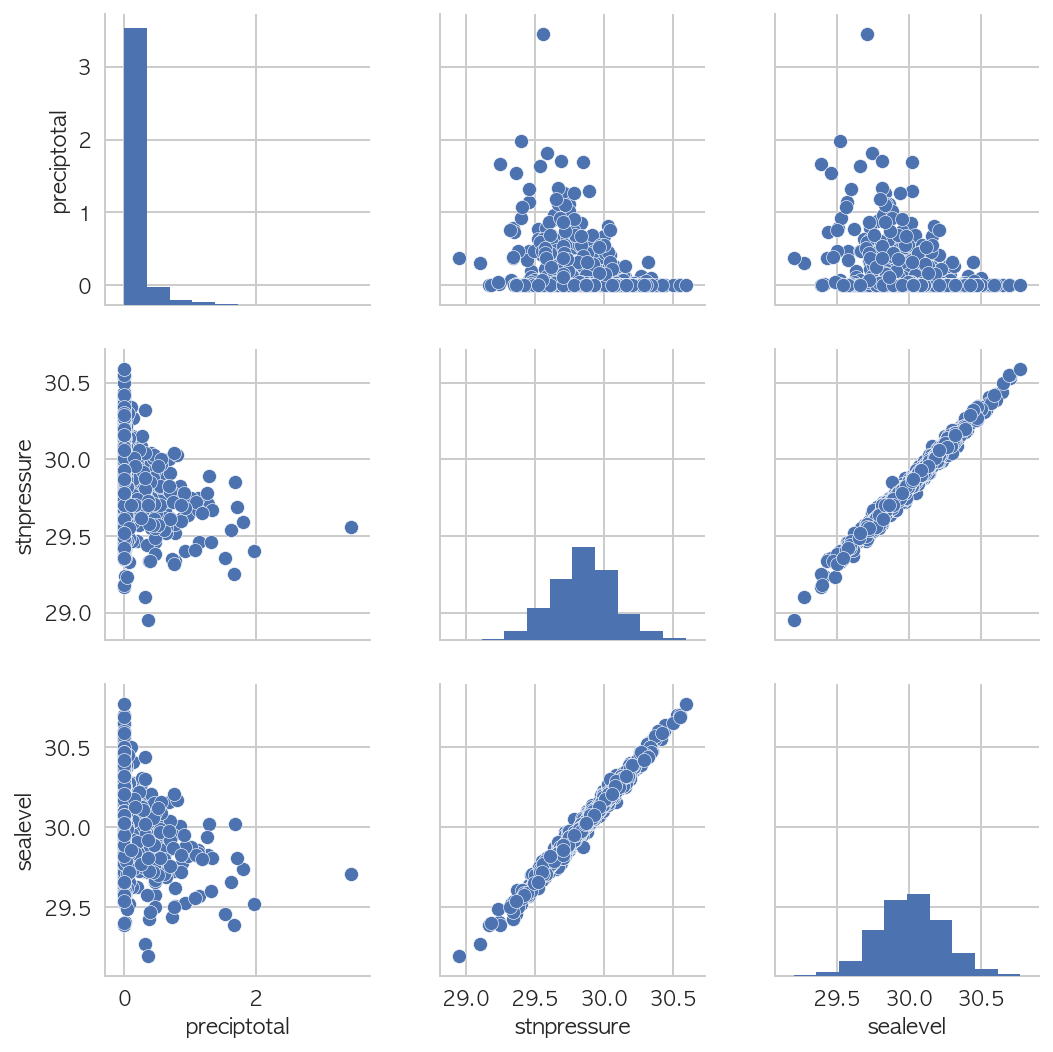

In [23]:
col_p_p = ["preciptotal", "stnpressure", "sealevel"]
sns.pairplot(station_1_p_p[col_p_p])
plt.show()

In [24]:
col_wind = ["resultspeed", "resultdir", "avgspeed"]
station_1_wind = cf.remove_m_row(station_1, col_wind)

원본 데이터프레임 length : 1029
제거하고 싶은 컬럼 : ['resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : []
제거한 float 컬럼 : ['resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 1025


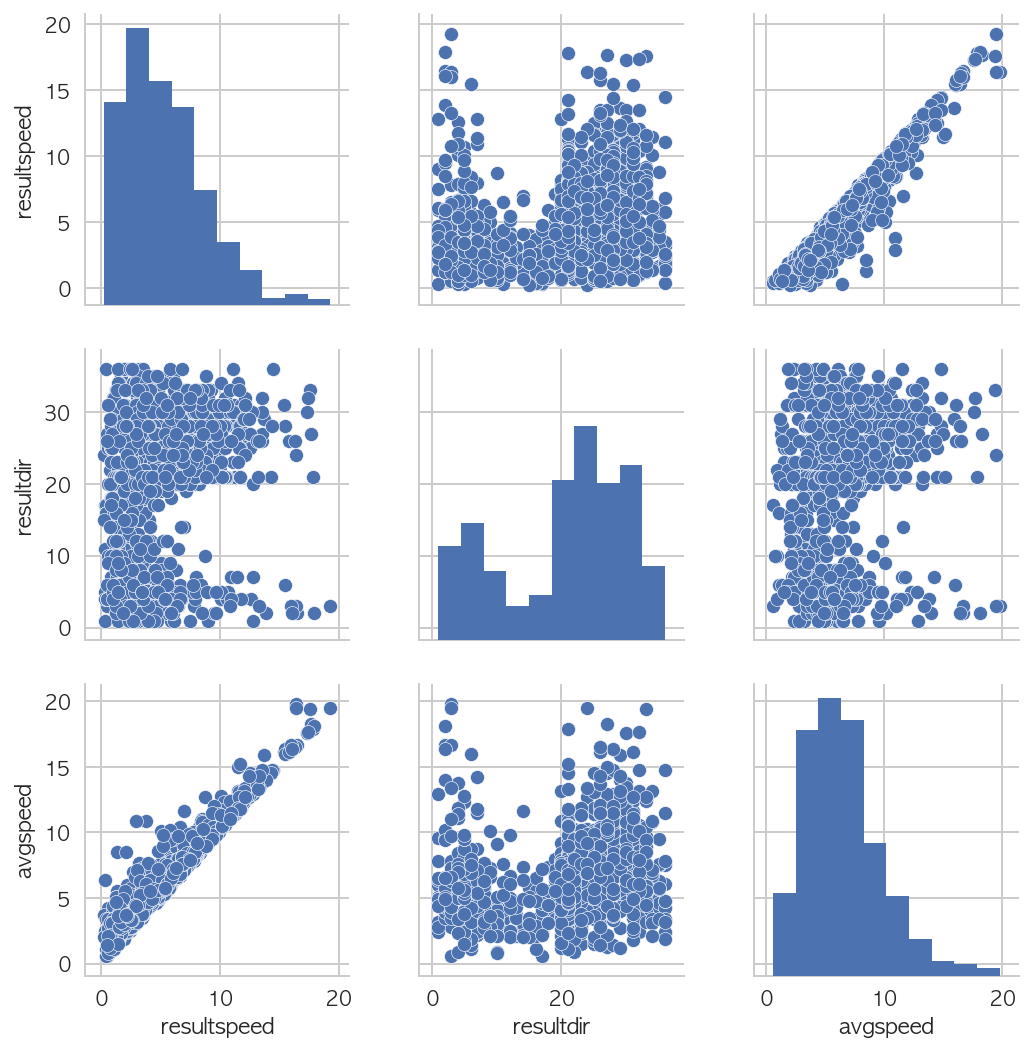

In [26]:
sns.pairplot(station_1_wind[col_wind])
plt.show()